In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import logging, sys, os
logger = logging.getLogger('21cmFAST')
logger.setLevel(logging.INFO)

import py21cmfast as p21c

from py21cmfast import plotting

from py21cmfast import cache_tools

from powerbox.tools import get_power

In [2]:
#Clear cache
p21c.config['direc'] = '_cache'
cache_tools.clear_cache(direc="_cache")

2020-10-29 13:49:50,772 | INFO | Removing IonizedBox_ea6ab94e78f5b8e043467f9fc761c4c4_r43798.h5
2020-10-29 13:49:50,781 | INFO | Removing PerturbedField_4f80a321ce14ce4b7a8536c8c72972a1_r43798.h5
2020-10-29 13:49:50,786 | INFO | Removing PerturbedField_157613553a6fd67eb8fe8e88454ab0a5_r30763.h5
2020-10-29 13:49:50,792 | INFO | Removing PerturbedField_c96bdc809a64f1841484bcb0aab4b197_r43798.h5
2020-10-29 13:49:50,801 | INFO | Removing IonizedBox_b5cb3f0d0de2796a40b56897575c3ecf_r30763.h5
2020-10-29 13:49:50,813 | INFO | Removing BrightnessTemp_c9f6f03191c70555f5fd671de630e601_r30763.h5
2020-10-29 13:49:50,818 | INFO | Removing PerturbedField_85d1e033ac54089feac59892ac907e9e_r30763.h5
2020-10-29 13:49:50,827 | INFO | Removing IonizedBox_1640a6357dee3b3a921ecd51c94158ed_r43798.h5
2020-10-29 13:49:50,839 | INFO | Removing IonizedBox_1013458079e513cfdef87d3c96a77860_r43798.h5
2020-10-29 13:49:50,848 | INFO | Removing PerturbedField_1147531fa5a468bd36f4516bfcd6331c_r43798.h5
2020-10-29 13:49

In [3]:
from random import randint

#Define a function to create a random number of a given length
def random_with_N_digits(n):
    range_start = 10**(n-1)
    range_end = (10**n)-1
    return randint(range_start, range_end)

#print(random_with_N_digits(5))

In [4]:
coeval8, coeval9, coeval10 = p21c.run_coeval(
    redshift = [8.0, 9.0, 10.0],
    user_params = {"HII_DIM": 100, "BOX_LEN": 100},
    cosmo_params = p21c.CosmoParams(SIGMA_8=0.8),
    astro_params = p21c.AstroParams({"HII_EFF_FACTOR":20.0}),
    random_seed=random_with_N_digits(5)
)

In the cell above, coeval cubes are formed for 3 different redshifts. The parameters passed are: 

User Parameters: "HII_DIM" is the number of cells for the low-res box
                 
              "BOX_LEN" is the length of the box, in Mpc
                 
Cosmological Parameters: "SIGMA_8" is the RMS mass variance (power spectrum normalisation)

Astrophysical Parameters: "HII_EFF_FACTOR" is the ionizing efficiency of high-z galaxies (zeta, from Eq. 2 of Greig+2015). Higher values tend to speed up reionization.

Then a random seed is passed, using the function defined above to allow for each model to be randomized. 

/home/kelder/src/miniconda3/envs/21cm/lib/python3.8/site-packages/py21cmfast/plotting.py:103: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow(slc, origin="lower", cmap=cmap, norm=norm, **imshow_kw)


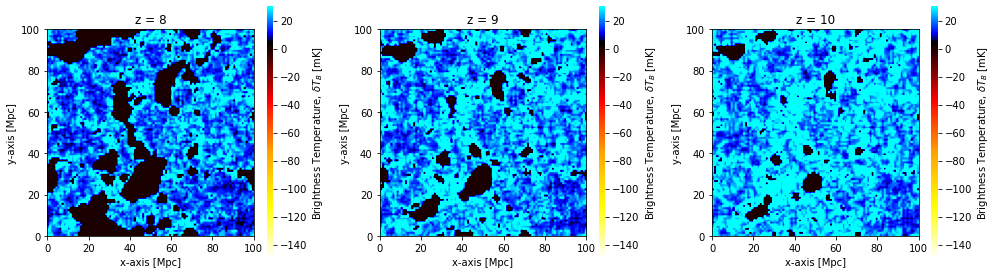

In [5]:
#Plot slices of the three cubes created
fig, ax = plt.subplots(1,3, figsize=(14,4))
for i, (coeval, redshift) in enumerate(zip([coeval8, coeval9, coeval10], [8,9,10])):
    plotting.coeval_sliceplot(coeval, ax=ax[i], fig=fig);
    plt.title("z = %s"%redshift)
plt.tight_layout()

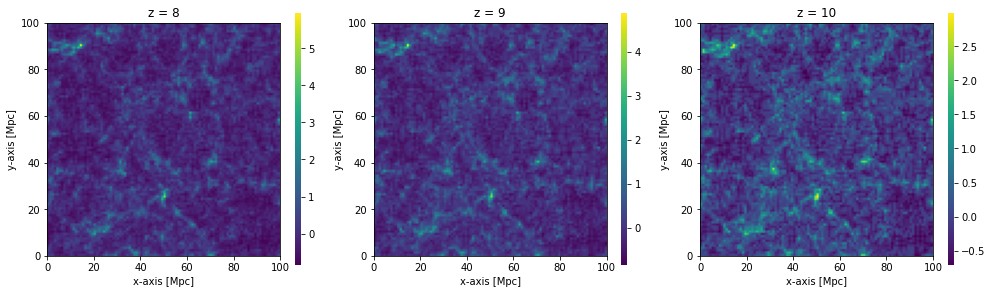

In [6]:
#Plot slices of the density for the three different redshifts
fig, ax = plt.subplots(1,3, figsize=(14,4))
for i, (coeval, redshift) in enumerate(zip([coeval8, coeval9, coeval10], [8,9,10])):
    plotting.coeval_sliceplot(coeval, kind='density', ax=ax[i], fig=fig);
    plt.title("z = %s"%redshift)
plt.tight_layout()

/home/kelder/src/miniconda3/envs/21cm/lib/python3.8/site-packages/powerbox/dft.py:121: UserWarning: You do not have pyFFTW installed. Installing it should give some speed increase.
  warnings.warn("You do not have pyFFTW installed. Installing it should give some speed increase.")


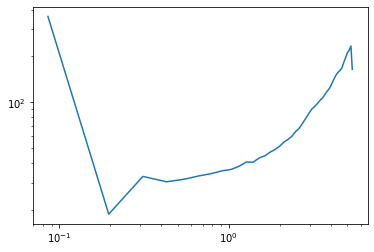

In [7]:
power, k = get_power(coeval8.brightness_temp, coeval8.user_params.BOX_LEN)
plt.loglog(k, power * k ** 3 / (2 * np.pi ** 2))

/home/kelder/src/miniconda3/envs/21cm/lib/python3.8/site-packages/powerbox/dft.py:121: UserWarning: You do not have pyFFTW installed. Installing it should give some speed increase.
  warnings.warn("You do not have pyFFTW installed. Installing it should give some speed increase.")
/home/kelder/src/miniconda3/envs/21cm/lib/python3.8/site-packages/powerbox/dft.py:121: UserWarning: You do not have pyFFTW installed. Installing it should give some speed increase.
  warnings.warn("You do not have pyFFTW installed. Installing it should give some speed increase.")
/home/kelder/src/miniconda3/envs/21cm/lib/python3.8/site-packages/powerbox/dft.py:121: UserWarning: You do not have pyFFTW installed. Installing it should give some speed increase.
  warnings.warn("You do not have pyFFTW installed. Installing it should give some speed increase.")


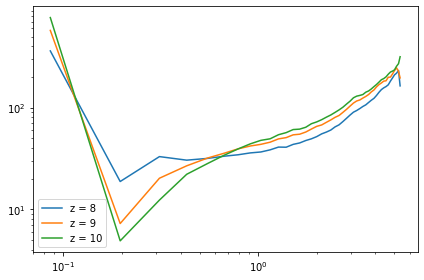

In [8]:
#fig, ax = plt.subplots(1,3, figsize=(14,4))
for i, (coeval, redshift) in enumerate(zip([coeval8, coeval9, coeval10], [8,9,10])):
    power, k = get_power(coeval.brightness_temp, coeval.user_params.BOX_LEN)
    plt.loglog(k, power * k ** 3 / (2 * np.pi ** 2), label="z = %s"%redshift);
plt.legend(loc='best')
plt.tight_layout()

In [9]:
coeval1, coeval2, coeval3, coeval4, coeval5, coeval6, coeval7 = p21c.run_coeval(
    redshift = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],
    user_params = {"HII_DIM": 100, "BOX_LEN": 100},
    cosmo_params = p21c.CosmoParams(SIGMA_8=0.8),
    astro_params = p21c.AstroParams({"HII_EFF_FACTOR":20.0}),
    random_seed=random_with_N_digits(5)
)

/home/kelder/src/miniconda3/envs/21cm/lib/python3.8/site-packages/powerbox/dft.py:121: UserWarning: You do not have pyFFTW installed. Installing it should give some speed increase.
  warnings.warn("You do not have pyFFTW installed. Installing it should give some speed increase.")
/home/kelder/src/miniconda3/envs/21cm/lib/python3.8/site-packages/powerbox/dft.py:121: UserWarning: You do not have pyFFTW installed. Installing it should give some speed increase.
  warnings.warn("You do not have pyFFTW installed. Installing it should give some speed increase.")
/home/kelder/src/miniconda3/envs/21cm/lib/python3.8/site-packages/powerbox/dft.py:121: UserWarning: You do not have pyFFTW installed. Installing it should give some speed increase.
  warnings.warn("You do not have pyFFTW installed. Installing it should give some speed increase.")
/home/kelder/src/miniconda3/envs/21cm/lib/python3.8/site-packages/powerbox/dft.py:121: UserWarning: You do not have pyFFTW installed. Installing it should gi

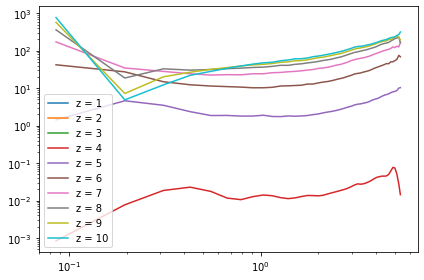

In [10]:
for i, (coeval, redshift) in enumerate(zip([coeval1, coeval2, coeval3, coeval4, coeval5, coeval6, coeval7, coeval8, coeval9, coeval10], [1,2,3,4,5,6,7,8,9,10])):
    power, k = get_power(coeval.brightness_temp, coeval.user_params.BOX_LEN)
    plt.loglog(k, power * k ** 3 / (2 * np.pi ** 2), label="z = %s"%redshift);
plt.legend(loc='best')
plt.tight_layout()